In [27]:
## This codes are used to quickly check the absorption peak when only rotating the HWP
## to get data with the laser polarisation is parallel and perpendicular to the 
## crystal axis of the sample

import os
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import sys
import statsmodels.api as sm

dir = 'C:\\Users\\wj2002\\Dropbox (Heriot-Watt University Team)\\RES_EPS_Quantum_Photonics_Lab\\Experiments\\Current Experiments\\Broadband telecom quantum memories\\2022_PrYVO_Spectroscopy\\Infrared\\Laser Spectroscopy'
folder = '191_01295'
# Measured data through the crystal, the first one is horizontal polarised and the second one is vertical polarised
files_data=['055.csv','010.csv'] 

num_of_files=np.size(files_data)

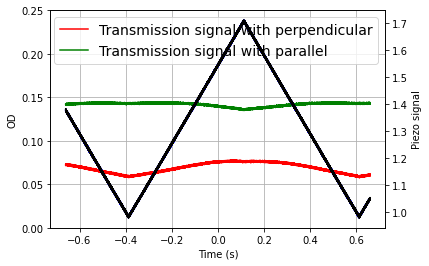

In [28]:
# In this cell, we quickly show the measured raw data

# Channel 1 of scope: Time; Channel 2: Piezo signal; Channel 3: transmission signal from balance detector;
# Channel 4: reflected signal from the photodetector

path_data=dir + '\\' + folder + '\\' + files_data[0] # This file is the transmission data when the laser is perpendicular to the crystal axis
path_ref =dir + '\\' + folder + '\\' + files_data[1] # This file is the transmission data when the laser is parallel to the crystal axis
data=pd.read_csv(path_data)
data=data.to_numpy() # Read the raw data when the laser is perpendicular to the crystal axis
ref =pd.read_csv(path_ref)
ref =ref.to_numpy() # Read the raw data when the laser is parallel to the crystal axis

transmission_ratio=max(data[:,2])/max(data[:,3]) # Calculate the intensity ratio between the measured transmitted signal and the reflected signal for the 
reflection_ratio=max(ref[:,2])/max(ref[:,3])

Time00=data[:,0] # Get the time scale, Channel 1
Piezo_trigger00=data[:,1] # Get the Piezo trigger signal, Channel 2
transmited_signal_perpendicular=data[:,2]
Time01=ref[:,0]
Piezo_trigger01=ref[:,1]
transmited_signal_parallel=ref[:,2]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(Time00, transmited_signal_perpendicular, 'r-', label='Transmission signal with perpendicular')
ax1.plot(Time01, transmited_signal_parallel, 'g-', label='Transmission signal with parallel')
ax1.legend(loc='upper right',fontsize=14)
ax2.plot(Time00, Piezo_trigger00, 'b-')
ax2.plot(Time01, Piezo_trigger01, 'k-')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('OD')
ax2.set_ylabel('Piezo signal')
ax1.set_ylim([0,0.25])
fig.patch.set_facecolor('white')
ax1.grid(True)
plt.show()


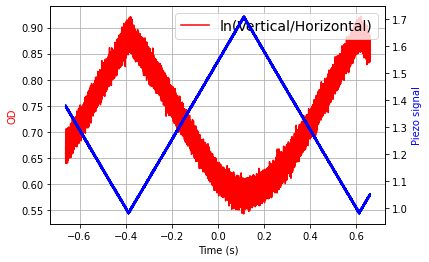

In [29]:

if len(data[:,0]) != len(ref[:,0]): # Sometime the saved data have different length
        length_data=min(len(data[:,0]),len(ref[:,0])) # Choose the minimum data length when the saved data have different length
        Time=data[0:length_data,0]
        Piezo_trigger_signal=data[0:length_data,1]
        normalised_data=data[0:length_data,2]/(data[0:length_data,3]*transmission_ratio) # Transmission signal is normalised to the reflected reference (polarisation is perpendicular to crystal axis) 
        normalised_ref=ref[0:length_data,2]/(ref[0:length_data,3]*reflection_ratio) # Transmission signal is normalised to the reflected reference (polarisation is parallel to crystal axis) 
        OD=np.log(normalised_ref/normalised_data) # Calculate OD
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(Time, OD, 'r-', label='ln(Vertical/Horizontal)')
        ax1.legend(loc='upper right',fontsize=14)
        ax2.plot(Time, Piezo_trigger_signal, 'b-')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('OD', color='r')
        ax2.set_ylabel('Piezo signal', color='b')
        #ax1.set_ylim([0,0.18])
        fig.patch.set_facecolor('white')
        ax1.grid(True)
        plt.show()
else:
        Piezo_trigger_signal=data[:,1]
        Time=data[:,0]
        #normalised_data=data[:,2]/(data[:,3]*transmission_ratio) # Transmission signal is normalised to the reflected reference (polarisation is perpendicular to crystal axis) 
        #normalised_ref=ref[:,2]/(ref[:,3]*reflection_ratio) # Transmission signal is normalised to the reflected reference (polarisation is parallel to crystal axis) 
        normalised_data=data[:,2]/(data[:,3]) # Transmission signal is normalised to the reflected reference (polarisation is perpendicular to crystal axis) 
        normalised_ref=ref[:,2]/(ref[:,3]) # Transmission signal is normalised to the reflected reference (polarisation is parallel to crystal axis) 
        
        OD=np.log(normalised_ref/normalised_data)
        #smoothed = sm.nonparametric.lowess(exog=Time, endog=OD)

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        #ax1.plot(Time, OD1, 'r-', label='ln(Vertical/Horizontal)')
        ax1.plot(Time, OD, 'r-', label='ln(Vertical/Horizontal)')
        #ax1.plot(Time, smoothed, 'g-')
        ax1.legend(loc='upper right',fontsize=14)
        ax2.plot(Time, Piezo_trigger_signal, 'b-')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('OD', color='r')
        ax2.set_ylabel('Piezo signal', color='b')
        #ax1.set_ylim([0,0.18])
        fig.patch.set_facecolor('white')
        ax1.grid(True)
        plt.show()

C:\Users\wj2002\AppData\Local\Temp\ipykernel_27224\923426872.py:53: RuntimeWarning: invalid value encountered in log
  OD=np.log(normalised_ref/normalised_data)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.3115150145902
2.078674099673
[21180]
[75775]


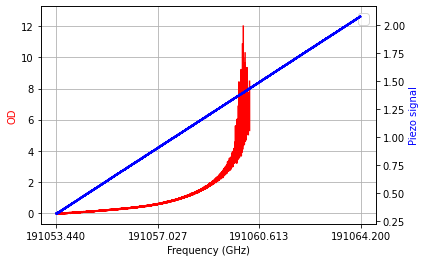

In [7]:
#This cell is used to calculate the scanning frequency range in one time period

Piezo_min=min(data[0:len(data[:,1])-30000,1]) # try to find the value of the first dip of the Piezo 
#Piezo_min=min(data[:,1])
Piezo_max=max(data[:,1]) # try to find the value of the first peak of the Piezo 
print(Piezo_min)
print(Piezo_max)
loc_piezo_min=np.where(data[0:len(data[:,1])-30000,1]==Piezo_min) # find the position of the first dip 
#loc_piezo_min=np.where(data[:,1]==Piezo_min)
loc_piezo_max=np.where(data[:,1]==Piezo_max) # find the position of the first peak
print(loc_piezo_min[0])
print(loc_piezo_max[0])
num_of_one_piezo_period=loc_piezo_max[0]-loc_piezo_min[0]

scanning_central_freq=191.05882 # Unit:THz
scanning_amplitude=40 # Unite:V
Piezo_slope=0.26898 # Unit: GHz/V; When the laser scanning offset is changed 1 V, the frequency will shift 0.26898 GHz (but need to check everytime)
freq_low=scanning_central_freq*1e3-Piezo_slope*scanning_amplitude/2
freq_high=scanning_central_freq*1e3+Piezo_slope*scanning_amplitude/2
freq_scale=np.linspace(freq_low,freq_high,int(num_of_one_piezo_period))

if len(data[:,0]) != len(ref[:,0]):
        length_data=min(len(data[:,0]),len(ref[:,0]))
        Time=data[0:length_data,0]
        Piezo_trigger_signal=data[0:length_data,1]
        normalised_data=data[0:length_data,2]/(data[0:length_data,3]*transmission_ratio)
        normalised_ref=ref[0:length_data,2]/(ref[0:length_data,3]*reflection_ratio)
        OD=np.log(normalised_ref/normalised_data)
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(freq_scale, OD[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'r-')
        ax1.legend(loc='lower right',fontsize=14)
        ax2.plot(freq_scale, Piezo_trigger_signal[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'b-')
        ax1.set_xlabel('Frequency (GHz)')
        ax1.set_ylabel('OD', color='r')
        ax2.set_ylabel('Piezo signal', color='b')
        #ax1.set_ylim([0,0.18])
        #ax1.set_xlim([freq_low,freq_high])
        xticks = np.linspace(freq_low, freq_high, 4)
        ax1.set_xticks(xticks)
        ax1.ticklabel_format(style='plain')
        ax1.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        
        fig.patch.set_facecolor('white')
        ax1.grid(True)
        plt.show()
else:
        Piezo_trigger_signal=data[:,1]
        Time=data[:,0]
        normalised_data=data[:,2]/(data[:,3]*transmission_ratio)
        normalised_ref=ref[:,2]/(ref[:,3]*reflection_ratio)
        OD=np.log(normalised_ref/normalised_data)

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(freq_scale, OD[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'r-')
        ax1.legend(loc='upper right',fontsize=14)
        ax2.plot(freq_scale, Piezo_trigger_signal[int(loc_piezo_min[0]):int(loc_piezo_max[0])], 'b-')
        ax1.set_xlabel('Frequency (GHz)')
        ax1.set_ylabel('OD', color='r')
        ax2.set_ylabel('Piezo signal', color='b')
        #ax1.set_ylim([0,0.18])
        #ax1.set_xlim([data[loc_piezo_min[0],0],data[loc_piezo_max[0],0]])
        xticks = np.linspace(freq_low, freq_high, 4)
        ax1.set_xticks(xticks)
        ax1.ticklabel_format(style='plain')
        ax1.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
        fig.patch.set_facecolor('white')
        ax1.grid(True)
        plt.show()